In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
# Geting the data

customer_data = pd.read_csv('/content/Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
customer_data['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


Data Visualisation

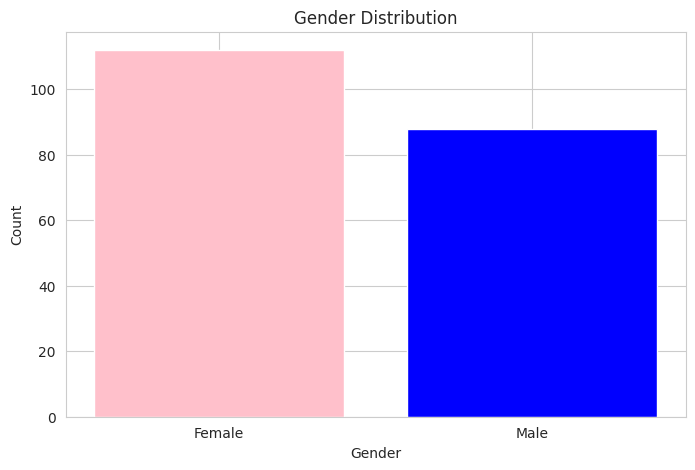

In [10]:
# Gender Distribution

plt.figure(figsize= (8, 5))
gender_counts = customer_data['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

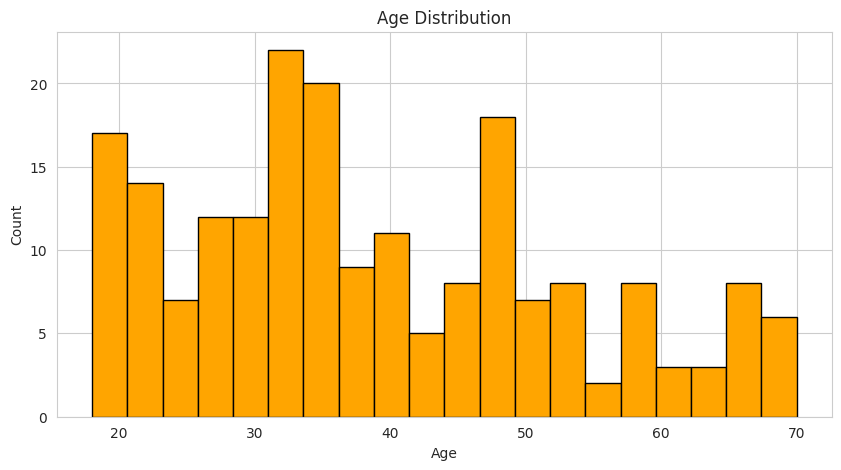

In [11]:
# Age Distribution

plt.figure(figsize= (10, 5))
plt.hist(customer_data['Age'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

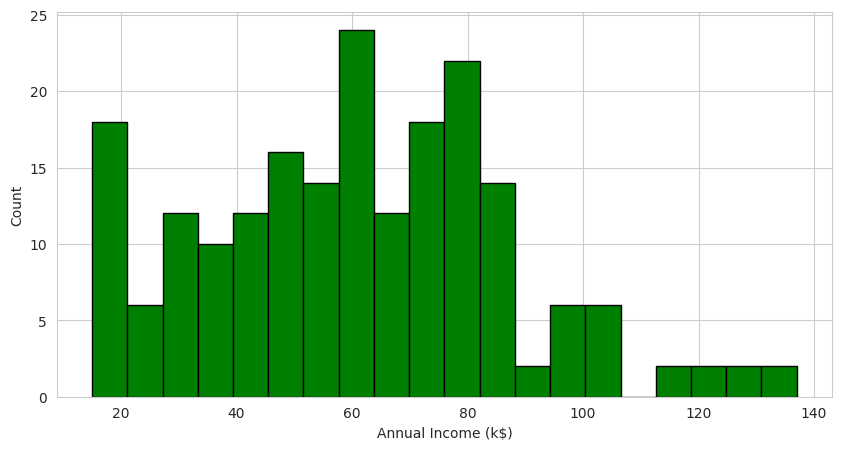

In [12]:
 plt.figure(figsize= (10, 5))
 plt.hist(customer_data['Annual Income (k$)'], bins=20, color='green', edgecolor='black')
 plt.xlabel('Annual Income (k$)')
 plt.ylabel('Count')
 plt.show()

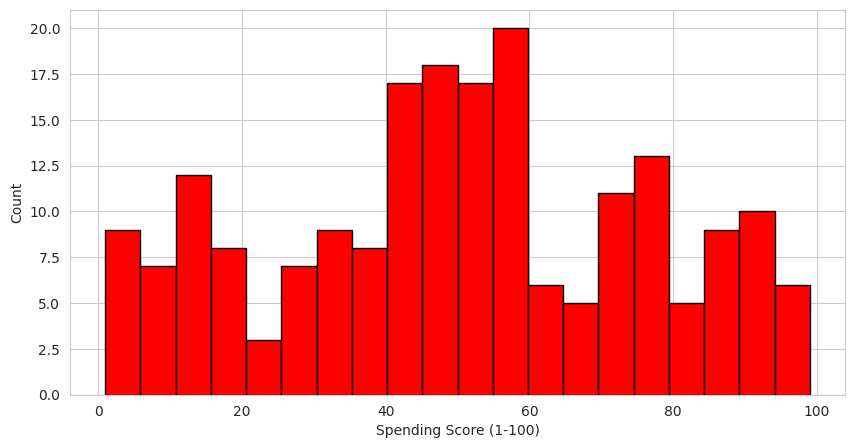

In [13]:
plt.figure(figsize= (10, 5))
plt.hist(customer_data['Spending Score (1-100)'], bins=20, color='red', edgecolor='black')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

In [14]:
# we are chooosing annual income and score for clustering
x = customer_data.iloc[:, [3, 4]].values

In [15]:
x.shape

(200, 2)

In [17]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Applying the elbow method

In [18]:
# Calculate WCSS for different numbers of clusters
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

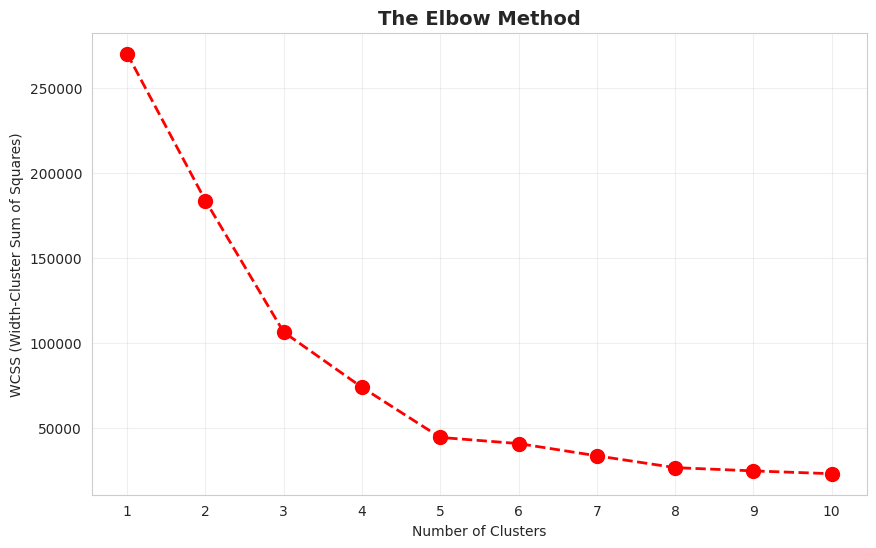

In [20]:
#plot the Elbow Graph

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red', linewidth = 2, markersize = 10)
plt.title('The Elbow Method', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Width-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# after looking at the elbow method
# 5 seems to be a good choice

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y = kmeans.fit_predict(x) # finds centroid and assign each customer to a centroid

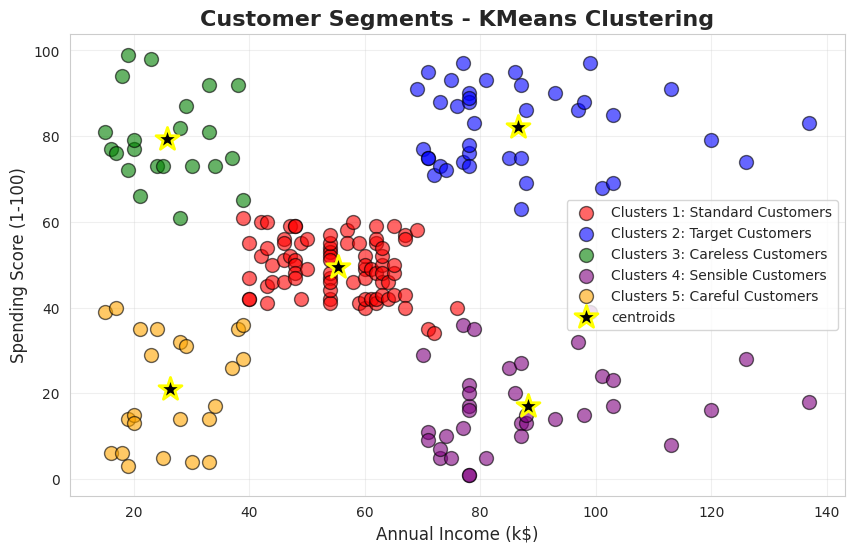

In [38]:
from scipy import cluster
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'purple', 'orange']
clusters_names = ['Standard Customers', 'Target Customers', 'Careless Customers', 'Sensible Customers', 'Careful Customers']

for i in range(5):
  plt.scatter(x[y==i, 0], x[y==i, 1], s=100, c=colors[i],
              label=f'Clusters {i + 1}: {clusters_names[i]}', alpha=0.6, edgecolors='black')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 300, c = 'black', marker='*', label = 'centroids', edgecolors='yellow', linewidth = 2)


plt.title('Customer Segments - KMeans Clustering', fontsize = 16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score (1-100)', fontsize = 12)
plt.legend(fontsize = 10)
plt.grid(True, alpha=0.3)
plt.show()

In [58]:
#Example
new_customer = np.array([[20,99]]) #Income - 70k, spending: 80
predicted_cluster = kmeans.predict(new_customer)[0]

print(f'Customer (Income: ${new_customer[0][0]}k, Spending: {new_customer[0][1]}) -- Cluster {predicted_cluster + 1}: {clusters_names[predicted_cluster]}')

Customer (Income: $20k, Spending: 99) -- Cluster 3: Careless Customers


In [59]:
# Saving the Model
joblib.dump(kmeans, 'customer_segmentation.pkl')
print("Model Saved")

Model Saved
